In [2]:
import pandas as pd

In [3]:
manga = pd.read_csv("best-selling-manga.csv")
manga

,Manga series,Author(s),Publisher,Demographic,No. of collected volumes,Serialized,Approximate sales in million(s),Average sales per volume in million(s)
0,One Piece,Eiichiro Oda,Shueisha,Shōnen,104,1997–present,516.6,4.97
1,Golgo 13,"Takao Saito, Saito Production",Shogakukan,Seinen,207,1968–present,300.0,1.45
2,Case Closed / Detective Conan,Gosho Aoyama,Shogakukan,Shōnen,102,1994–present,270.0,2.65
3,Dragon Ball,Akira Toriyama,Shueisha,Shōnen,42,1984–1995,260.0,6.19
4,Doraemon,Fujiko F. Fujio,Shogakukan,Children,45,1969–1996,250.0,4.71
...,...,...,...,...,...,...,...,...
182,Sukeban Deka,Shinji Wada,Hakusensha,Shōjo,22,1976–1982,20.0,0.90
183,Swan,Kyoko Ariyoshi,Shueisha,Shōjo,21,1976–1981,20.0,0.95
184,The Tale of Genji,Waki Yamato,Kodansha,Shōjo,13,1980–1993,20.0,1.53
185,Tokyo Daigaku Monogatari,Tatsuya Egawa,Shogakukan,Seinen,34,1992–2001,20.0,0.58


### Best Sellers

In [4]:
manga.loc[0:3,["Manga series","Approximate sales in million(s)"]]

,Manga series,Approximate sales in million(s)
0,One Piece,516.6
1,Golgo 13,300.0
2,Case Closed / Detective Conan,270.0
3,Dragon Ball,260.0


### Demographic Information

In [5]:
Demographics = manga.groupby(["Demographic"], as_index=False).sum()
Demographics = Demographics.drop(columns=["Serialized", "Manga series", "Author(s)",'Publisher'])
Demographics["Amount"] = manga.groupby("Demographic").size().values
Demographics["Average sales per volume in million(s)"] = Demographics["Average sales per volume in million(s)"]/Demographics["Amount"]
Demographics.at[8,"Demographic"] = "unknown"
Demographics

,Demographic,No. of collected volumes,Approximate sales in million(s),Average sales per volume in million(s),Amount
0,Children,244,321.20,1.552500,4
1,Josei,73,67.00,1.125000,2
2,Seinen,2647,1991.33,0.968600,50
3,Shōjo,684,654.10,1.292857,21
4,Shōjo/Josei,83,27.00,0.330000,1
5,Shōnen,4331,5871.30,1.628515,101
6,Shōnen/Seinen,477,450.00,0.955000,6
7,Shōnen/shōjo/Josei,27,25.00,1.080000,1
8,unknown,45,86.00,1.910000,1


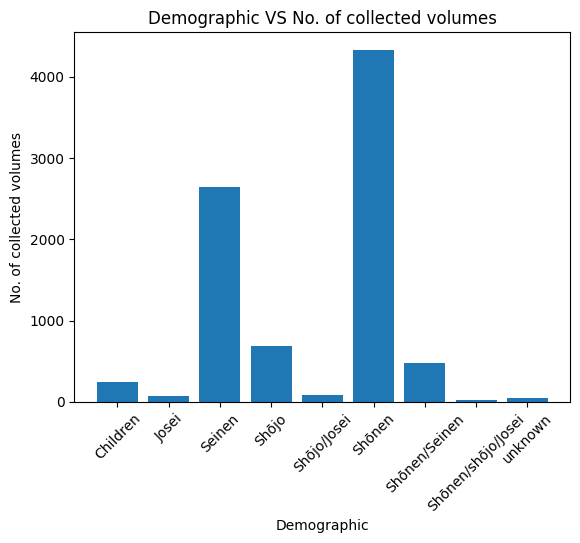

In [6]:
import matplotlib.pyplot as plt

plt.bar(Demographics["Demographic"], Demographics["No. of collected volumes"])
plt.title('Demographic VS No. of collected volumes')
plt.xlabel('Demographic')
plt.ylabel('No. of collected volumes')
plt.xticks(rotation=45)  # Rotate the labels by 45 degrees
plt.show()

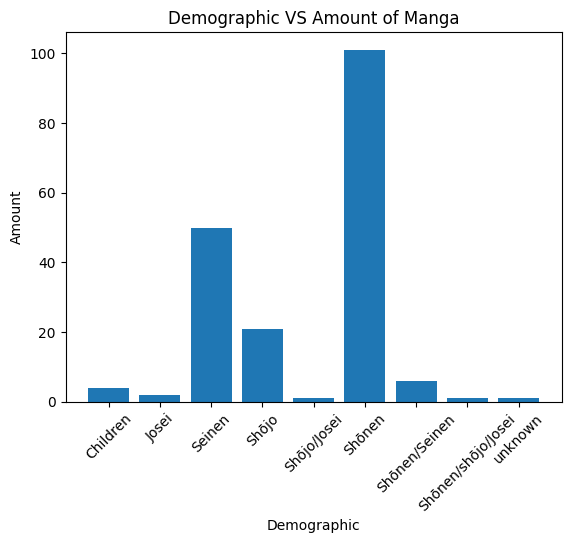

In [7]:
import matplotlib.pyplot as plt

plt.bar(Demographics["Demographic"], Demographics["Amount"])
plt.title('Demographic VS Amount of Manga')
plt.xlabel('Demographic')
plt.ylabel('Amount')
plt.xticks(rotation=45)  # Rotate the labels by 45 degrees
plt.show()

/home/thomas/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


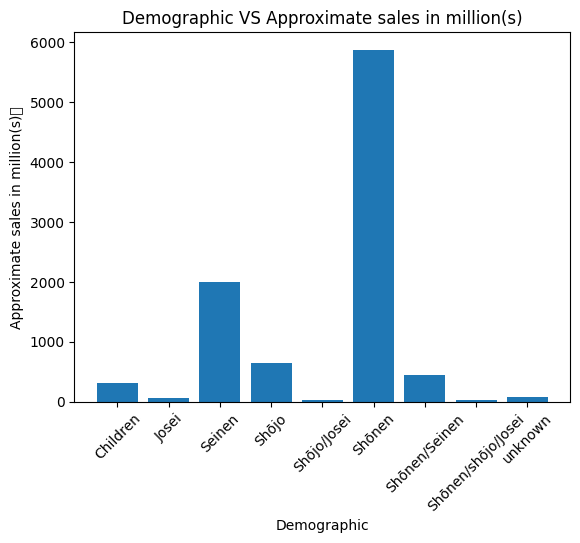

In [8]:
import matplotlib.pyplot as plt

plt.bar(Demographics["Demographic"], Demographics["Approximate sales in million(s)"])
plt.title('Demographic VS Approximate sales in million(s)')
plt.xlabel('Demographic')
plt.ylabel('Approximate sales in million(s)	')
plt.xticks(rotation=45)  # Rotate the labels by 45 degrees
plt.show()

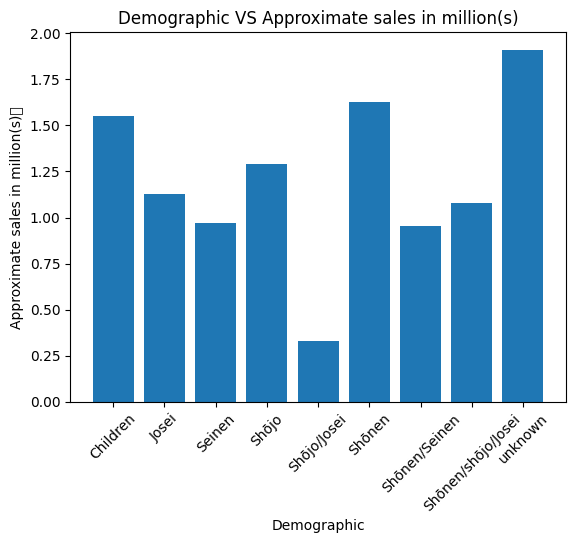

In [9]:
import matplotlib.pyplot as plt

plt.bar(Demographics["Demographic"], Demographics["Average sales per volume in million(s)"])
plt.title('Demographic VS Approximate sales in million(s)')
plt.xlabel('Demographic')
plt.ylabel('Approximate sales in million(s)	')
plt.xticks(rotation=45)  # Rotate the labels by 45 degrees
plt.show()

# Sales Information

/home/thomas/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


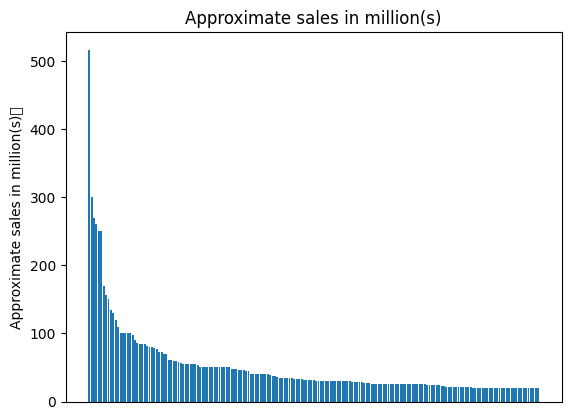

In [30]:



plt.bar(manga["Manga series"], manga["Approximate sales in million(s)"])
plt.title('Approximate sales in million(s)')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

plt.ylabel('Approximate sales in million(s)	')
plt.show()

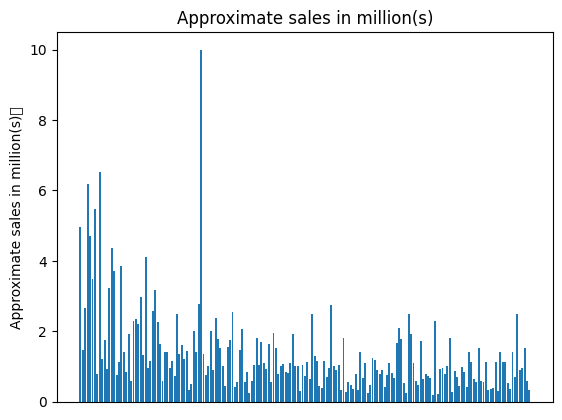

In [26]:
import matplotlib.pyplot as plt

plt.bar(manga["Manga series"], manga["Average sales per volume in million(s)"])
plt.title('Approximate sales in million(s)')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.ylabel('Approximate sales in million(s)	')
plt.show()

## Sales by year

In [21]:
years = manga
years["year serialized"] = manga["Serialized"].apply(lambda x: x.split("–")[0])
years = years.sort_values("year serialized")
years = years.groupby("year serialized", as_index=False).sum()

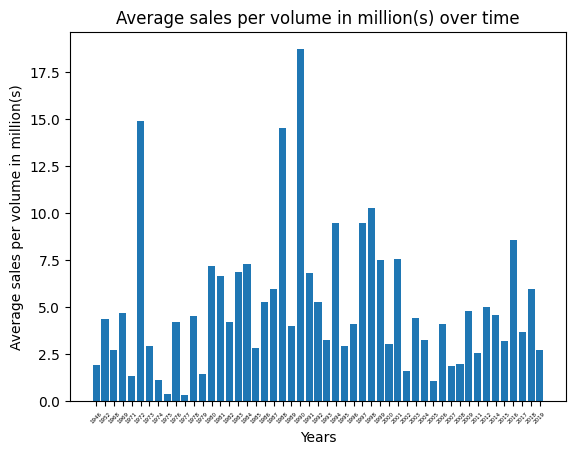

In [25]:
import matplotlib.pyplot as plt

plt.bar(years["year serialized"], years["Average sales per volume in million(s)"])
plt.title('Average sales per volume in million(s) over time')
#plt.tick_params(
#    axis='x',          # changes apply to the x-axis
#    which='both',      # both major and minor ticks are affected
#    bottom=False,      # ticks along the bottom edge are off
#    top=False,         # ticks along the top edge are off
#    labelbottom=True) # labels along the bottom edge are off
plt.xticks(rotation=45)
plt.xticks(fontsize=4)
plt.ylabel('Average sales per volume in million(s)')
plt.xlabel('Years')
plt.show()